In [ ]:
# !pip install deepface

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import os
import time
import re
import cv2
from deepface import DeepFace

2025-02-12 18:14:56.451528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739366096.463290   13146 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739366096.466838   13146 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-12 18:14:56.479332: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# !wget https://postechackr-my.sharepoint.com/:u:/g/personal/dongbinna_postech_ac_kr/EcWlrJ2qjtRJtQVIwR1kW2EBTj8le3PdXI4TYsKErsGMcA?download=1 -O CelebA_HQ_facial_identity_dataset_test.zip
# !unzip CelebA_HQ_facial_identity_dataset_test.zip -d ./CelebA_HQ_facial_identity_dataset_test

In [2]:
def get_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [3]:
celeb = sorted(glob.glob('Celeb_Faces_Dataset/Leonardo DiCaprio/*.jpg'))

In [4]:
len(celeb)

100

In [7]:
img1_path = celeb[2]
img2_path = celeb[9]

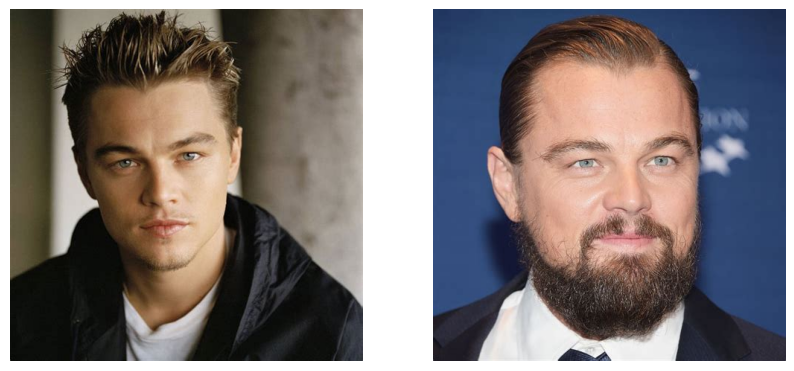

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(get_image(img1_path))
ax[0].axis("off")

ax[1].imshow(get_image(img2_path))
ax[1].axis("off")

plt.show()

## 1. Face Detection

In [26]:
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'fastmtcnn',
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yolov11s',
  'yolov11n',
  'yolov11m',
  'yunet',
  'centerface',
]

In [27]:
face = DeepFace.extract_faces(img_path=img1_path, detector_backend=backends[5])

2025-02-12 18:35:09.503444: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1739367309.503533   13146 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4985 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1739367312.110149   14902 cuda_dnn.cc:529] Loaded cuDNN version 90701


In [28]:
face

[{'face': array([[[0.03137255, 0.02745098, 0.01176471],
          [0.03529412, 0.03137255, 0.01568627],
          [0.05490196, 0.05098039, 0.03529412],
          ...,
          [0.19215686, 0.10980392, 0.03529412],
          [0.1372549 , 0.0627451 , 0.00784314],
          [0.31372549, 0.24705882, 0.18823529]],
  
         [[0.05490196, 0.05098039, 0.03529412],
          [0.00392157, 0.        , 0.        ],
          [0.03921569, 0.03529412, 0.02352941],
          ...,
          [0.15294118, 0.07058824, 0.        ],
          [0.14117647, 0.06666667, 0.01960784],
          [0.3372549 , 0.26666667, 0.21176471]],
  
         [[0.06666667, 0.0627451 , 0.04705882],
          [0.01960784, 0.01568627, 0.        ],
          [0.02745098, 0.02352941, 0.00784314],
          ...,
          [0.12156863, 0.04705882, 0.        ],
          [0.17647059, 0.10980392, 0.04313725],
          [0.29019608, 0.22352941, 0.16862745]],
  
         ...,
  
         [[0.03921569, 0.04705882, 0.03529412],
      

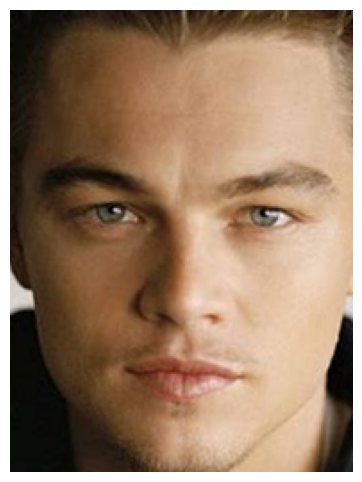

In [29]:
img = face[0]['face']
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.imshow(img);

In [30]:
def draw_facial_features(img_path, face_objs, size=(6, 6), eyes=True):
    img = get_image(img_path)
    fig, ax = plt.subplots(figsize=size)
    ax.imshow(img)

    for face_obj in face_objs:
        face = face_obj['facial_area']
        rect = plt.Rectangle((face['x'], face['y']), face['w'], face['h'], linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        if eyes:        
            if face.get('left_eye'):
                ax.scatter(*face['left_eye'], c='b', s=40, alpha=0.4, label='Left Eye')
            if face.get('right_eye'):
                ax.scatter(*face['right_eye'], c='g', s=40, alpha=0.4, label='Right Eye')
    
    plt.axis("off")
    plt.show()

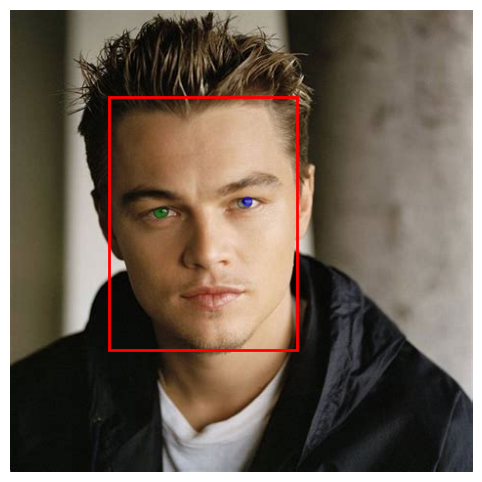

In [31]:
draw_facial_features(img1_path, face)

In [43]:
face_objs = DeepFace.extract_faces(
  img_path = "women_vollyball.jpg", 
  detector_backend = backends[12],
    enforce_detection=False,
)

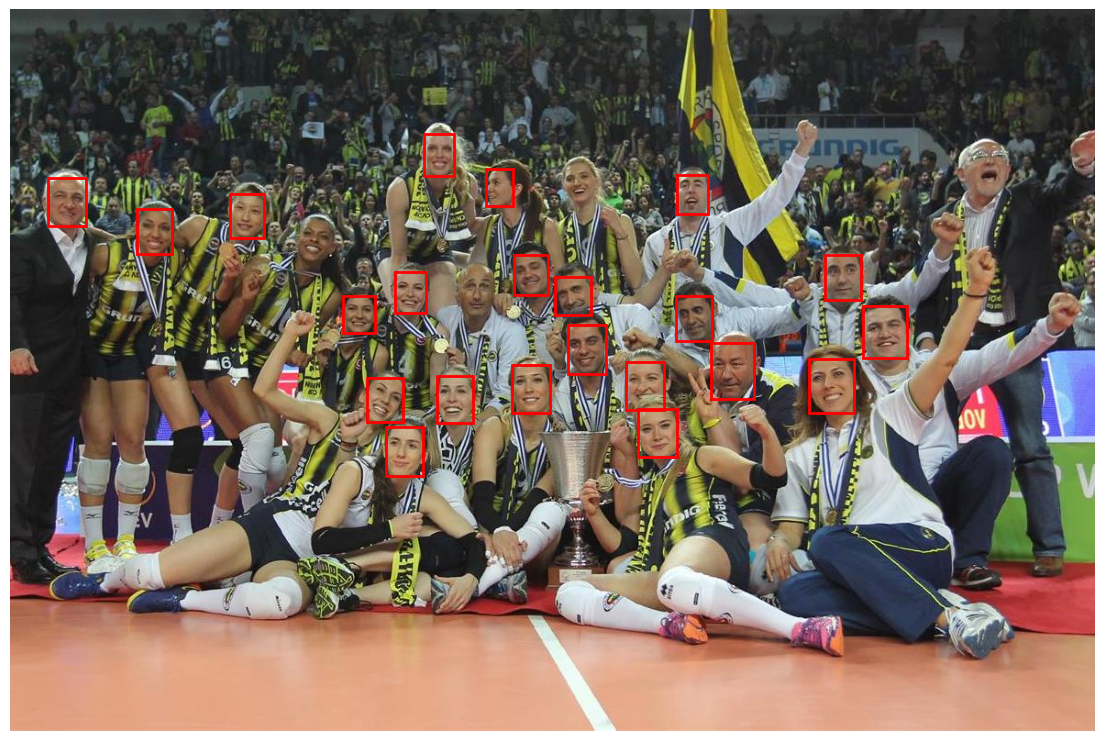

In [44]:
draw_facial_features("women_vollyball.jpg", face_objs, (14, 14), False)

In [53]:
tic = time.time()
DeepFace.extract_faces(img_path=img1_path, detector_backend=backends[11])
toc = time.time()

In [51]:
toc-tic

0.061402082443237305

## 2. Face Verification (1:1 Matching)

In [57]:
celeb2 = sorted(glob.glob('Celeb_Faces_Dataset/Johnny Depp/*.jpg'))

In [54]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
  "GhostFaceNet"
]

In [58]:
result = DeepFace.verify(
    img1_path, 
    celeb2[10],
    model_name = models[1]
)

In [59]:
result

{'verified': False,
 'distance': 0.8332883323332118,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 77,
   'y': 106,
   'w': 247,
   'h': 247,
   'left_eye': (237, 198),
   'right_eye': (155, 209)},
  'img2': {'x': 121,
   'y': 70,
   'w': 183,
   'h': 183,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.39}

## 3. Face Recognition (1:N Matching)

In [60]:
database_path = "Celeb_Faces_Dataset"

In [64]:
dfs = DeepFace.find(
  img_path = celeb2[10],
  db_path = database_path,
)

25-02-12 18:55:18 - Searching Celeb_Faces_Dataset/Johnny Depp/011_c826a613.jpg in 1957 length datastore
25-02-12 18:55:18 - find function duration 0.8318934440612793 seconds


In [65]:
dfs[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,Celeb_Faces_Dataset/Johnny Depp/011_c826a613.jpg,0770e2527a90688d3eb2d2a557fb9212fa7b6c06,121,70,183,183,121,70,183,183,0.68,0.000000
1,Celeb_Faces_Dataset/Johnny Depp/039_13af66c8.jpg,df5eef40f7d180477ea8dd2006aaa73f05cb5ad6,161,123,169,169,121,70,183,183,0.68,0.347173
2,Celeb_Faces_Dataset/Johnny Depp/088_1fcc7b2c.jpg,cc29dedf1e0155c93777dbfb40a09a765bb5b31f,109,33,314,314,121,70,183,183,0.68,0.353428
3,Celeb_Faces_Dataset/Johnny Depp/040_2e8934ea.jpg,69fcf803123498c20855a2b56599fb77dedcf685,99,122,226,226,121,70,183,183,0.68,0.368997
4,Celeb_Faces_Dataset/Johnny Depp/070_1e22daa2.jpg,896dc8db4db3f1ee07d1843ddc4c68b3153448a2,98,109,296,296,121,70,183,183,0.68,0.382971
...,...,...,...,...,...,...,...,...,...,...,...,...
56,Celeb_Faces_Dataset/Johnny Depp/024_bfac5f5b.jpg,2093ee26a12632349a7d305afa2d90302d07438a,85,83,279,279,121,70,183,183,0.68,0.672355
57,Celeb_Faces_Dataset/Johnny Depp/017_aadefe7b.jpg,4938c28ad2451237e80f199078f8a67f876ed377,136,73,139,139,121,70,183,183,0.68,0.672746
58,Celeb_Faces_Dataset/Johnny Depp/020_6b7d8470.jpg,5b1fe088435c14af7ce5764c9ed4dab4baf2af5d,139,99,194,194,121,70,183,183,0.68,0.674494
59,Celeb_Faces_Dataset/Johnny Depp/080_38c2109a.jpg,b5d4957389e9155c6ebc49429c5f61dd2bb4593c,143,58,184,184,121,70,183,183,0.68,0.674954


In [66]:
re.search(r'Celeb_Faces_Dataset/([^/]+)/', dfs[0]['identity'][0]).group(1)

'Johnny Depp'

## 4. Face Embeddings


In [82]:
models[3]

'OpenFace'

In [97]:
embedding_objs = DeepFace.represent(
    img_path = celeb2[10],
    model_name = models[3]
)

In [98]:
# embedding_objs

In [99]:
embedding = np.array(embedding_objs[0]["embedding"])

In [100]:
embedding.shape

(128,)

In [101]:
embedding_matrix = embedding.reshape(1, -1)

In [102]:
embedding_matrix.shape

(1, 128)

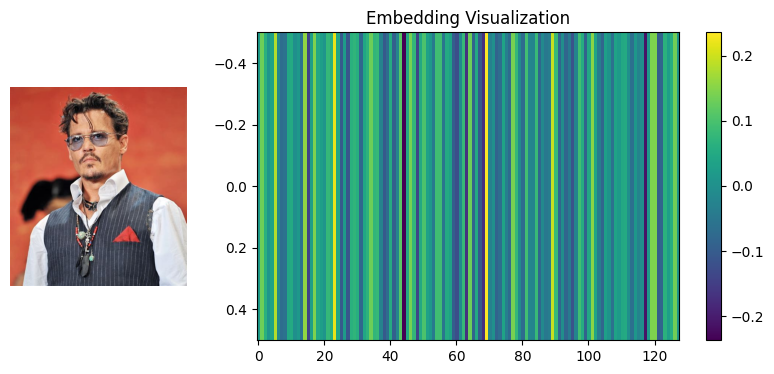

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 3]})
img = get_image(celeb2[10])
ax[0].imshow(img)
ax[0].axis("off")

im = ax[1].imshow(embedding_matrix, aspect="auto", cmap="viridis")
ax[1].set_title("Embedding Visualization")
fig.colorbar(im, ax=ax[1])
plt.show()

## 5. Face Attribute Analysis

In [109]:
analysis = DeepFace.analyze(
  img_path = img1_path, 
  actions = ['age', 'gender', 'race', 'emotion']
)

Action: emotion: 100%|████████████████████████████| 4/4 [00:00<00:00, 62.56it/s]


In [110]:
analysis

[{'age': 25,
  'region': {'x': 77,
   'y': 106,
   'w': 247,
   'h': 247,
   'left_eye': (237, 198),
   'right_eye': (155, 209)},
  'face_confidence': np.float64(0.95),
  'gender': {'Woman': np.float32(0.012756478), 'Man': np.float32(99.98724)},
  'dominant_gender': 'Man',
  'race': {'asian': np.float32(1.9653691),
   'indian': np.float32(3.3974304),
   'black': np.float32(1.055843),
   'white': np.float32(39.084362),
   'middle eastern': np.float32(22.184221),
   'latino hispanic': np.float32(32.312775)},
  'dominant_race': 'white',
  'emotion': {'angry': np.float32(0.20848571),
   'disgust': np.float32(3.6942265e-06),
   'fear': np.float32(0.18759777),
   'happy': np.float32(0.029866476),
   'sad': np.float32(2.0052683),
   'surprise': np.float32(0.0030357104),
   'neutral': np.float32(97.56575)},
  'dominant_emotion': 'neutral'}]

In [111]:
for r in analysis:
    print(f"age: {r['age']}")
    print(f"gender: {r['dominant_gender']}")
    print(f"race: {r['dominant_race']}")
    print(f"emotion: {r['dominant_emotion']}")

age: 25
gender: Man
race: white
emotion: neutral
